In [1]:
import argparse
import os
import sys
import networkx as nx
import numpy as np
import pandas as pd
import statistics
import time
import datetime
import subprocess
import matplotlib.pyplot as plt

In [46]:
conda install altair_saver

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ ^C
failed with repodata from current_repodata.json, will retry with next repodata source.

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [39]:
import seaborn as sns
import altair as alt
from altair_saver import save

In [73]:
def read_layer(file_layer):
    """
    input : file_layer, the name of a gene co-expression network edge file corresponding to an class
    return : layer, a coexpresson's networkx graph,
    """
    layer = nx.Graph()
    with open(file_layer) as infile:
        for line in infile:
            if line.startswith("Node1"):
                continue
            list_line = line.rstrip().split(',')
            # if float(list_line[2]) > 0.0: #only positive corellation of coexpression are take in account
            # node1, node2 = tuple(sorted([list_line[0].split(".")[0], list_line[1].split(".")[0]]))
            node1, node2 = tuple(sorted([list_line[0], list_line[1]]))
            cor = list_line[2]
            layer.add_edge(node1, node2, pearson=float(cor))
    return layer

In [74]:
input_file='/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_0.9_sample_random_all/'
df_empty=pd.DataFrame(columns=['number_of_edges','number_of_nodes','number_connected_components','average_clustering_coefficient','diameter', 'average_shortest_path_length'])
files = os.listdir(input_file)
list_path = []
for i in files:
    print(i)
    df_empty.loc[i]='NA'
    input_file2=f'{input_file}{i}/multilayer_edges_0.7.csv'
    print(input_file2)
    x=read_layer(input_file2)
    df_empty.loc[i,'number_of_edges']=x.number_of_edges()
    print(x.number_of_edges())
    df_empty.loc[i,'number_of_nodes']=x.number_of_nodes()
    print(x.number_of_nodes())
    df_empty.loc[i,'number_connected_components']=nx.number_connected_components(x)
    print(nx.number_connected_components(x))
    df_empty.loc[i,'average_clustering_coefficient']=nx.average_clustering(x)
    print(nx.average_clustering(x))

class3_male
/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_0.9_sample_random_all/class3_male/multilayer_edges_0.7.csv
86886
6552
569
0.3522731670550808
class4_male
/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_0.9_sample_random_all/class4_male/multilayer_edges_0.7.csv
51606
7603
596
0.2652129592642894
class4_female
/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_0.9_sample_random_all/class4_female/multilayer_edges_0.7.csv
144991
6779
732
0.3530154667869606
class2_female
/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_0.9_sample_random_all/class2_female/multilayer_edges_0.7.csv
53753
5487
563
0.3258634993658851
class2_male
/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_0.9_sample_random_all/class2_male/multilayer_edges_0.7.csv
268811
7656
592
0.327576609060838
class3_female
/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_0.9_sample_random_all/class3_female/mu

### distribution of the ratio

In [3]:
import csv

In [14]:
input_file='/home/storage_1/yuping/compute_GCN/result_concensus_h'
files = os.listdir(input_file)
list_path = []
for i in files:
    print(i)
    input_file2=f'{input_file}{i}/multilayer_edges.csv'
    print(input_file2)

class1_Female_0.0
/home/storage_1/yuping/compute_GCN/result_concensus_15sample_sp/class1_Female_0.0/multilayer_edges.csv
class2_Male_0.0
/home/storage_1/yuping/compute_GCN/result_concensus_15sample_sp/class2_Male_0.0/multilayer_edges.csv
class1_Male_0.0
/home/storage_1/yuping/compute_GCN/result_concensus_15sample_sp/class1_Male_0.0/multilayer_edges.csv
class4_Male_0.0
/home/storage_1/yuping/compute_GCN/result_concensus_15sample_sp/class4_Male_0.0/multilayer_edges.csv
class3_Male_0.0
/home/storage_1/yuping/compute_GCN/result_concensus_15sample_sp/class3_Male_0.0/multilayer_edges.csv
class3_Female_0.0
/home/storage_1/yuping/compute_GCN/result_concensus_15sample_sp/class3_Female_0.0/multilayer_edges.csv
class2_Female_0.0
/home/storage_1/yuping/compute_GCN/result_concensus_15sample_sp/class2_Female_0.0/multilayer_edges.csv
class4_Female_0.0
/home/storage_1/yuping/compute_GCN/result_concensus_15sample_sp/class4_Female_0.0/multilayer_edges.csv


In [125]:
list_female=['class1_female','class2_female','class3_female','class4_female']

In [126]:
list_male=['class1_male','class2_male','class3_male','class4_male']

In [17]:
pd_read=pd.read_csv("/home/storage_1/yuping/compute_GCN/result_concensus_test_class3/class3_Female_0.0/multilayer_edges.csv")

In [18]:
pd_read['ratio']

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
1014091    1.0
1014092    1.0
1014093    1.0
1014094    1.0
1014095    1.0
Name: ratio, Length: 1014096, dtype: float64

In [1]:
input_file="/home/storage_1/yuping/compute_GCN/result_concensus_new_methode_random2/class4_male/multilayer_edges_row.csv"

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

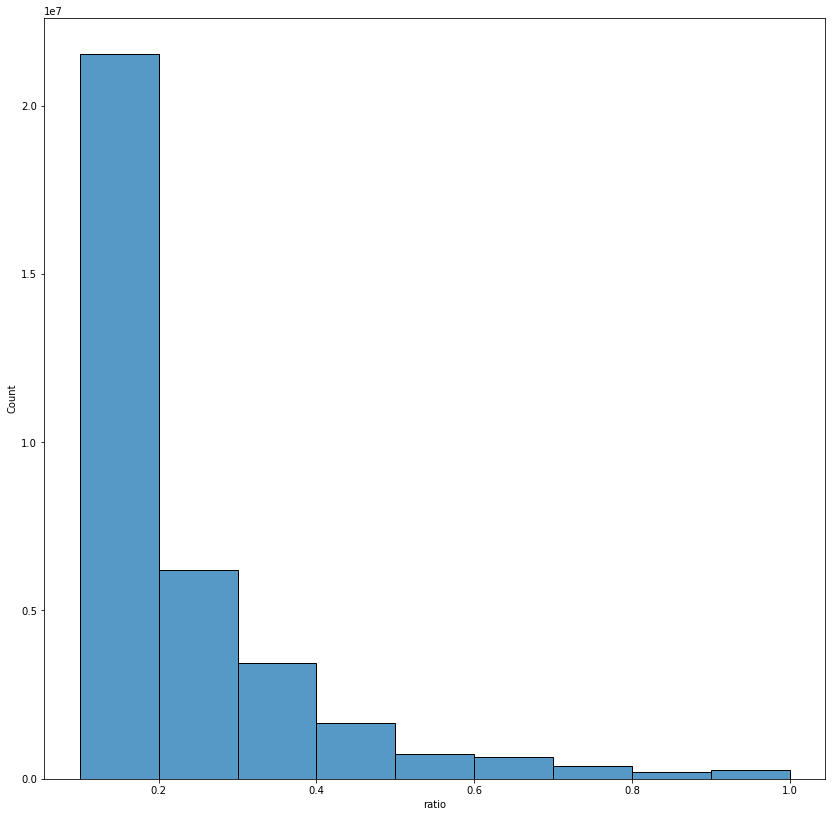

In [6]:
plt.figure(figsize=(14,14))
pd_read=pd.read_csv(input_file)
x=sns.histplot(pd_read['ratio'], bins=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1])
x.savefig('edges_vs_ratio_test.pdf')

<AxesSubplot:xlabel='ratio', ylabel='Count'>

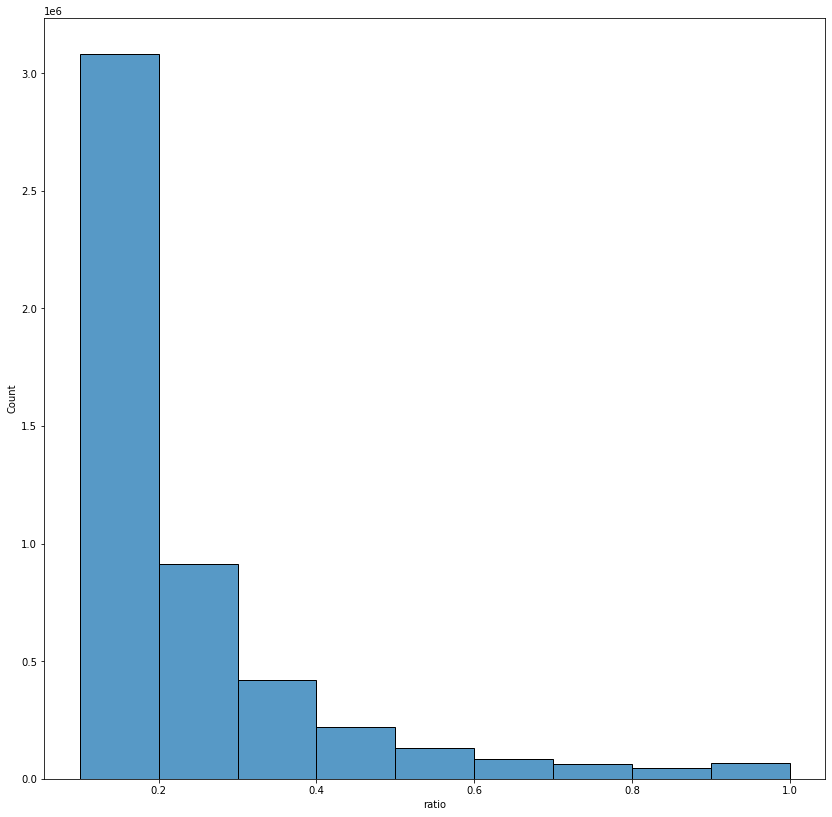

In [92]:
input_file="/home/storage_1/yuping/compute_GCN/blood/40-49_male/multilayer_edges_row.csv"
plt.figure(figsize=(14,14))
pd_read=pd.read_csv(input_file)
sns.histplot(pd_read['ratio'], bins=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1])

In [39]:
list_commen=[0,1,2,3,4,5,6]

In [41]:
if [i for i in list_commen if i >= 5]:
    print('False')
else:
    print('True')

False


In [9]:
x.savefig('edges_vs_ratio_male.pdf')

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [28]:
input_file='/home/storage_1/yuping/compute_GCN/result_concensus_15sample_sp/'
for i in list_male:
    print(i)
    input_file2=f'{input_file}{i}/multilayer_edges.csv'
    print(input_file2)

class1_male_0.0
/home/storage_1/yuping/compute_GCN/result_concensus_15sample_sp//class1_male_0.0/multilayer_edges.csv
class2_male_0.0
/home/storage_1/yuping/compute_GCN/result_concensus_15sample_sp//class2_male_0.0/multilayer_edges.csv
class3_male_0.0
/home/storage_1/yuping/compute_GCN/result_concensus_15sample_sp//class3_male_0.0/multilayer_edges.csv
class4_male_0.0
/home/storage_1/yuping/compute_GCN/result_concensus_15sample_sp//class4_male_0.0/multilayer_edges.csv


In [62]:
i=-0.82

In [65]:
if (i != 0):
    print(i)

-0.82


class1_male
/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_10_sample_random_all/class1_male/multilayer_edges_row.csv
class1
class2_male
/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_10_sample_random_all/class2_male/multilayer_edges_row.csv
class2
class3_male
/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_10_sample_random_all/class3_male/multilayer_edges_row.csv
class3
class4_male
/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_10_sample_random_all/class4_male/multilayer_edges_row.csv
class4


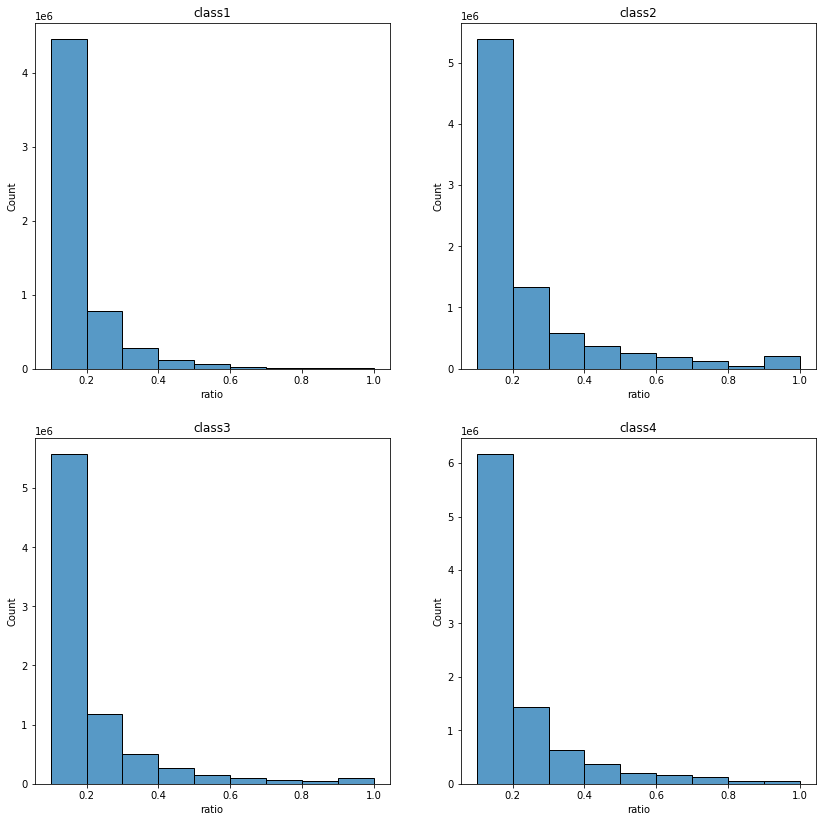

In [44]:
input_file='/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_10_sample_random_all/'
n=1
plt.figure(figsize=(14,14))
for i in list_male:
    ax=plt.subplot(2,2,n)
    print(i)
    input_file2=f'{input_file}{i}/multilayer_edges_row.csv'
    print(input_file2)
    pd_read=pd.read_csv(input_file2)
    sns.histplot(pd_read['ratio'], bins=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1],ax=ax)
    i=i.split('_')
    print(i[0])
    ax.set_title(i[0])
    n=n+1
plt.savefig('edges_vs_ratio_male_hypo_10sample.pdf')

In [97]:
input_file2='/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_10_sample_random_all/class1_male/multilayer_edges_row.csv'

In [98]:
pd_read=pd.read_csv(input_file2)

In [104]:
x=pd_read.value_counts('ratio',normalize=True)

In [107]:
df_empty['class1_male']=x

In [95]:
df_empty=pd.DataFrame(columns=list_male)

In [108]:
df_empty

class1_male class2_male class3_male class4_male
ratio                                                 
0.1       0.774355         NaN         NaN         NaN
0.2       0.135840         NaN         NaN         NaN
0.3       0.048489         NaN         NaN         NaN
0.4       0.021049         NaN         NaN         NaN
0.5       0.009927         NaN         NaN         NaN
0.6       0.004680         NaN         NaN         NaN
0.7       0.002698         NaN         NaN         NaN
0.8       0.001303         NaN         NaN         NaN
0.9       0.000980         NaN         NaN         NaN
1.0       0.000679         NaN         NaN         NaN

In [385]:
df=pd.DataFrame(columns=['class_age','sex','ratio','count','count_nor'])

In [400]:
bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

In [19]:
df

class_age   sex  ratio     count  count_nor
0     class3  male    0.1  10788328   0.760627
1     class3  male    0.2   1775903   0.125209
2     class3  male    0.3    740568   0.052213
3     class3  male    0.4    351805   0.024804
4     class3  male    0.5    233144   0.016438
..       ...   ...    ...       ...        ...
75    class1  male    0.6     84550   0.007604
76    class1  male    0.7     66845   0.006012
77    class1  male    0.8     83209   0.007483
78    class1  male    0.9     10717   0.000964
79    class1  male    1.0      4622   0.000416

[80 rows x 5 columns]

In [42]:
alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('sex:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(count_nor):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('class_age:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('ratio:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#96ceb4', '#ffcc5c','#ff6f69','#8A2BE2','#F0FFFF','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#000000'],
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    ).properties(
    width=200,
    height=750
)

alt.Chart(...)

In [263]:
df

class_age   sex  ratio     count  count_nor
0     class3  male    1.0    127901   0.007017
1     class3  male    0.9     13559   0.000744
2     class3  male    0.8     54853   0.003009
3     class3  male    0.7     96722   0.005306
4     class3  male    0.6    128713   0.007061
..       ...   ...    ...       ...        ...
85    class5  male    0.5    485517   0.019742
86    class5  male    0.4    674776   0.027438
87    class5  male    0.3   1303149   0.052989
88    class5  male    0.2   3291760   0.133851
89    class5  male    0.1  18301719   0.744191

[90 rows x 5 columns]

In [40]:
chart2=alt.Chart(df).mark_line().encode(

    # tell Altair which field to group columns on
    x=alt.X('class_age:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(count):Q',
        axis=alt.Axis(
            grid=False,
            title=None),sort=alt.EncodingSortField(field='count_nor',op='sum',order="descending")),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('sex:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('ratio:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#96ceb4', '#ffcc5c','#ff6f69','#8A2BE2','#F0FFFF','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#000000'],
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    ).properties(
    width=800,
    height=750
)


In [41]:
chart2

alt.Chart(...)

Empty DataFrame
Columns: [class_age, sex, ratio, count, count_nor]
Index: []

In [71]:
save(chart, "chart.html")  

In [35]:
df

class_age   sex  ratio     count  count_nor
0      class3  male    1.0    807439   0.018146
1      class3  male    0.9     50136   0.001127
2      class3  male    0.8     75621   0.001699
3      class3  male    0.7    116919   0.002628
4      class3  male    0.6    408767   0.009186
..        ...   ...    ...       ...        ...
115    class5  male    0.5    360994   0.007551
116    class5  male    0.4   1084823   0.022691
117    class5  male    0.3   2937474   0.061442
118    class5  male    0.2   5891825   0.123236
119    class5  male    0.1  36131691   0.755749

[120 rows x 5 columns]

In [34]:
input_file='/home/storage_1/yuping/compute_GCN/hypo_petiteclass/'
df=pd.DataFrame(columns=['class_age','sex','ratio','count','count_nor'])
files = os.listdir(input_file)
list_path = []
for i in files:
    i_split=i.split('_')
    input_file2=f'{input_file}{i}/multilayer_edges_row.csv'
    pd_read=pd.read_csv(input_file2)
    df1=pd.DataFrame(columns=['class_age','sex','ratio','count','count_nor'])
    bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    segments=pd.cut(pd_read['ratio'],bins)
    x=pd.value_counts(segments,normalize=True).sort_index(ascending=False)
    print(x)
    bins.reverse()
    y=pd_read.value_counts(segments)
    df1['count_nor']=x
    df1['ratio']=bins[:-1]
    df1['count']=y
    df1['sex']=i_split[1]
    df1['class_age']=i_split[0]
    df=pd.concat([df,df1],axis=0,ignore_index=True)

(0.9, 1.0]    0.018146
(0.8, 0.9]    0.001127
(0.7, 0.8]    0.001699
(0.6, 0.7]    0.002628
(0.5, 0.6]    0.009186
(0.4, 0.5]    0.016165
(0.3, 0.4]    0.033447
(0.2, 0.3]    0.041104
(0.1, 0.2]    0.131416
(0.0, 0.1]    0.745082
Name: ratio, dtype: float64
(0.9, 1.0]    0.001459
(0.8, 0.9]    0.001377
(0.7, 0.8]    0.001980
(0.6, 0.7]    0.004095
(0.5, 0.6]    0.005156
(0.4, 0.5]    0.008263
(0.3, 0.4]    0.022434
(0.2, 0.3]    0.043565
(0.1, 0.2]    0.119564
(0.0, 0.1]    0.792108
Name: ratio, dtype: float64
(0.9, 1.0]    0.003554
(0.8, 0.9]    0.003144
(0.7, 0.8]    0.003356
(0.6, 0.7]    0.004744
(0.5, 0.6]    0.006932
(0.4, 0.5]    0.015841
(0.3, 0.4]    0.032594
(0.2, 0.3]    0.052402
(0.1, 0.2]    0.146062
(0.0, 0.1]    0.731371
Name: ratio, dtype: float64
(0.9, 1.0]    0.004625
(0.8, 0.9]    0.000525
(0.7, 0.8]    0.001612
(0.6, 0.7]    0.002097
(0.5, 0.6]    0.002502
(0.4, 0.5]    0.016084
(0.3, 0.4]    0.021757
(0.2, 0.3]    0.033814
(0.1, 0.2]    0.112411
(0.0, 0.1]    0.804

In [261]:
df

class_age   sex  ratio     count  count_nor
0     class3  male    1.0    127901   0.007017
1     class3  male    0.9     13559   0.000744
2     class3  male    0.8     54853   0.003009
3     class3  male    0.7     96722   0.005306
4     class3  male    0.6    128713   0.007061
..       ...   ...    ...       ...        ...
85    class5  male    0.5    485517   0.019742
86    class5  male    0.4    674776   0.027438
87    class5  male    0.3   1303149   0.052989
88    class5  male    0.2   3291760   0.133851
89    class5  male    0.1  18301719   0.744191

[90 rows x 5 columns]

In [374]:
list1=['class1']*10

In [375]:
list1

['class1',
 'class1',
 'class1',
 'class1',
 'class1',
 'class1',
 'class1',
 'class1',
 'class1',
 'class1']

In [205]:
bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

In [189]:
bins

[1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0]

In [206]:
input_file='/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_20rep_0.85_sample_random_all/'
df_empty_male=pd.DataFrame(columns=list_female)
df_empty_male2=pd.DataFrame(columns=list_female)
for i in list_female:
    print(i)
    df=pd.DataFrame(columns=['class_age','sex','ratio','count','count_nor'])
    input_file2=f'{input_file}{i}/multilayer_edges_row.csv'
    pd_read=pd.read_csv(input_file2)
    segments=pd.cut(pd_read['ratio'],bins)
    x=pd.value_counts(segments,normalize=True)
    y=pd_read.value_counts(segments)
    df_empty_male[i]=x
    df_empty_male2[i]=y

class1_female
class2_female
class3_female
class4_female


In [402]:
df_empty_male

Empty DataFrame
Columns: [class1_male, class2_male, class3_male, class4_male]
Index: []

In [322]:
bins=np.arange(0,1,0.1)

In [117]:
bins=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

In [115]:
read=pd.read_csv('/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_20rep_0.85_sample_random_all/class1_male/multilayer_edges_row.csv')

In [118]:
segments=pd.cut(read['ratio'],bins)
x=pd.value_counts(segments,normalize=True)
df_empty_male[i]=x

NameError: name 'df_empty_male' is not defined

In [130]:
df

Empty DataFrame
Columns: [class_age, sex, ratio, count, count_nor]
Index: []

In [129]:
df_empty_male

class1_male  class2_male  class3_male  class4_male
(0.1, 0.2]     0.530104     0.556676     0.523072     0.546952
(0.2, 0.3]     0.200532     0.185873     0.218126     0.213556
(0.3, 0.4]     0.104035     0.100492     0.103620     0.101074
(0.4, 0.5]     0.060399     0.049679     0.068670     0.072264
(0.5, 0.6]     0.035495     0.031234     0.058102     0.028877
(0.7, 0.8]     0.034932     0.007944     0.005247     0.009088
(0.6, 0.7]     0.028063     0.020033     0.017117     0.014663
(0.8, 0.9]     0.004499     0.007325     0.003434     0.006128
(0.9, 1.0]     0.001940     0.040745     0.002612     0.007400

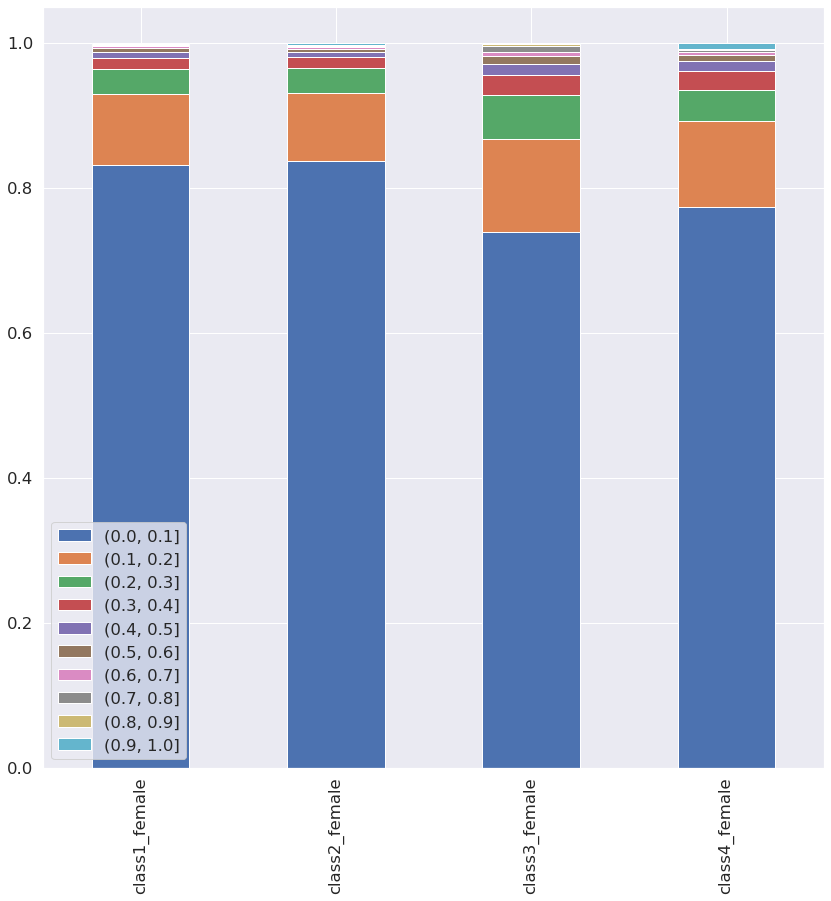

In [207]:
ax=df_empty_male.transpose().plot.bar(stacked=True,figsize=(14,14))
fig=ax.get_figure()
plt.legend(loc='lower left')
fig.savefig('plot_0.85_ratio_edges_female.pdf')

In [133]:
ax=df_empty2.iloc[0:5].transpose().plot(figsize=(14,14))
fig=ax.get_figure()
fig.savefig('plotline_0.85_ratio_edges_male_zoomin0_0.5.pdf')

NameError: name 'df_empty2' is not defined

In [ ]:
ax=df_empty2.iloc[5:10].transpose().plot(figsize=(14,14))
fig=ax.get_figure()
fig.savefig('plotline_0.85_ratio_edges_male_zoomin0.6_1.0.pdf')

#### edges 

In [66]:
input_file='/home/storage_1/yuping/compute_GCN/hypo_petiteclass/'
df_empty=pd.DataFrame(columns=['class_age','sex','count'])
files = os.listdir(input_file)
list_path = []
for i in files:
    i_split=i.split('_')
    input_file2=f'{input_file}{i}/multilayer_edges_row.csv'
    read=pd.read_csv(input_file2)
    df1=pd.DataFrame(columns=['class_age','sex','count'])
    list_empty=[]
    for g in range(1,21):
        g=str(g)
        x=read.value_counts(g).tolist()
        list_empty.append(x[1])
    df1['count']=list_empty
    df1['sex']=i_split[1]
    df1['class_age']=i_split[0]
    print(df1)
    df_empty=pd.concat([df_empty,df1],axis=0,ignore_index=True)

   class_age   sex    count
0     class3  male  5092395
1     class3  male  6898541
2     class3  male  6609816
3     class3  male  4916498
4     class3  male  7322391
5     class3  male  5064831
6     class3  male  4986182
7     class3  male  4921428
8     class3  male  4829049
9     class3  male  2612302
10    class3  male  7412062
11    class3  male  5352000
12    class3  male  5200188
13    class3  male  5704252
14    class3  male  5350699
15    class3  male  6633033
16    class3  male  5042456
17    class3  male  5713146
18    class3  male  6714659
19    class3  male  5046862
   class_age   sex    count
0     class4  male  4512426
1     class4  male  4319368
2     class4  male  4168703
3     class4  male  4920978
4     class4  male  4664131
5     class4  male  4862720
6     class4  male  3807204
7     class4  male  4704873
8     class4  male  3797629
9     class4  male  4243531
10    class4  male  4821973
11    class4  male  4657074
12    class4  male  4775878
13    class4  male  

In [68]:
df_empty

class_age   sex    count
0      class3  male  5092395
1      class3  male  6898541
2      class3  male  6609816
3      class3  male  4916498
4      class3  male  7322391
..        ...   ...      ...
235    class5  male  5436900
236    class5  male  4640100
237    class5  male  4628986
238    class5  male  5936885
239    class5  male  5401612

[240 rows x 3 columns]

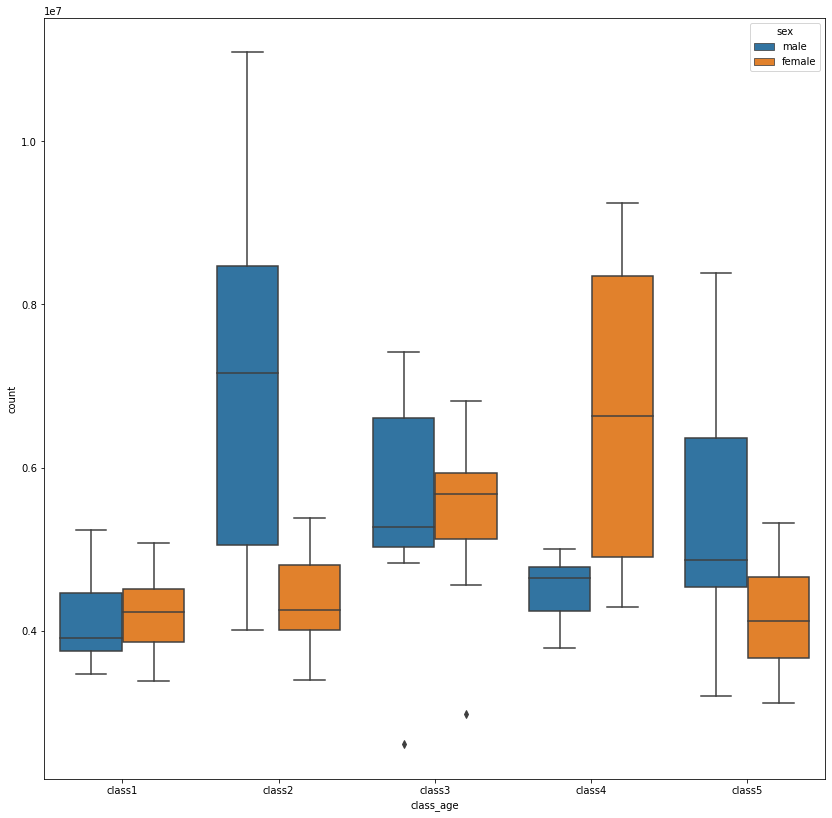

In [67]:
plt.figure(figsize=(14,14))
ax=sns.boxplot(y='count', x='class_age',
                 data=df_empty,
                 palette="tab10",
                 hue='sex',order=['class1','class2','class3','class4','class5'])
plt.savefig('plot_box_two_sex.pdf')

1.0
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1


<Figure size 1008x1008 with 0 Axes>

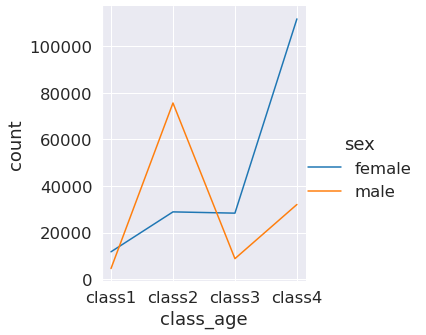

<Figure size 1008x1008 with 0 Axes>

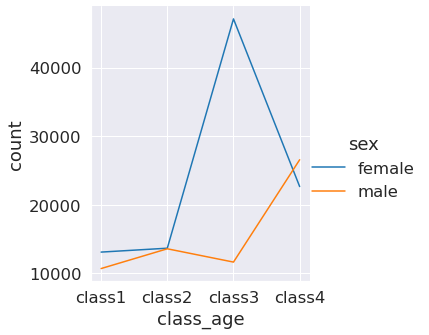

<Figure size 1008x1008 with 0 Axes>

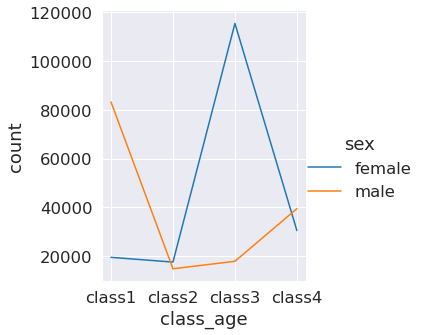

<Figure size 1008x1008 with 0 Axes>

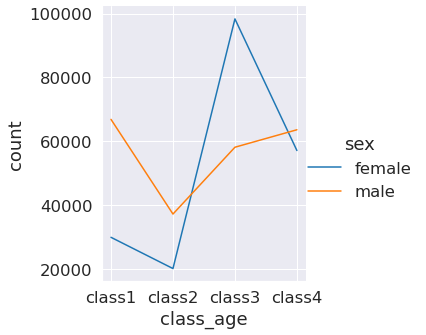

<Figure size 1008x1008 with 0 Axes>

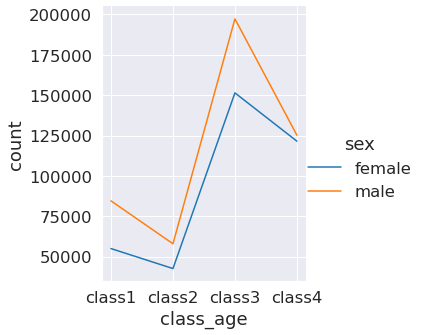

<Figure size 1008x1008 with 0 Axes>

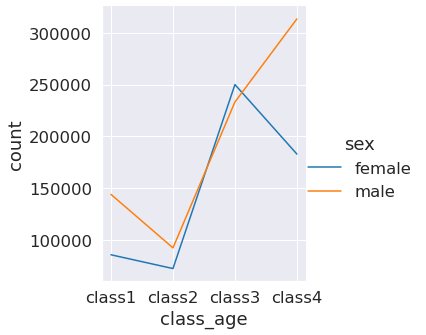

<Figure size 1008x1008 with 0 Axes>

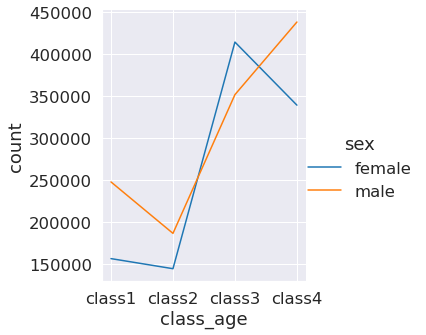

<Figure size 1008x1008 with 0 Axes>

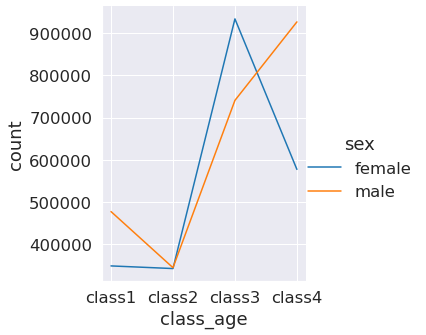

<Figure size 1008x1008 with 0 Axes>

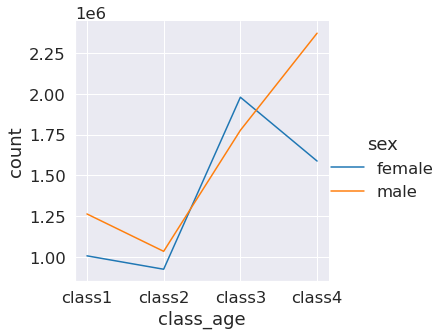

<Figure size 1008x1008 with 0 Axes>

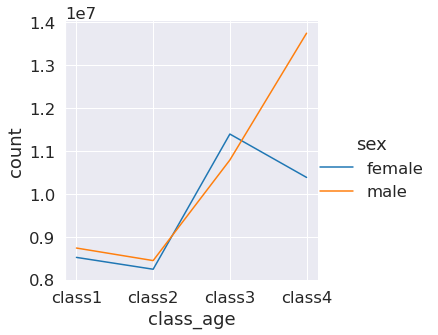

In [199]:
bins=[1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
for i in bins:
    print(i)
    df2=df[df['ratio']==i]
    df2=df2.sort_values(by=['class_age'])
    plt.figure(figsize=(14,14))
    sns.relplot(y='count', x='class_age',kind ='line',
                 data=df2,
                 palette="tab10",
                 hue='sex')
    name=f'plot_ratio_count_{i}.pdf'
    plt.savefig(name)

#### edges vs nodes

In [238]:
def read_layer2(df):
    """
    input : file_layer, the name of a gene co-expression network edge file corresponding to an class
    return : layer, a coexpresson's networkx graph,
    """
    layer = nx.Graph()
    for idx,row in df.iterrows():
        if row[3]=='True':
            node1, node2 = tuple(sorted([row[0], row[1]]))
            cor = row[2]
            layer.add_edge(node1, node2, pearson=float(cor))
    return layer

In [239]:
input_file='/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_20rep_0.85_sample_random_all/'
df_empty=pd.DataFrame(columns=['class_age','sex','edges','nodes'])
files = os.listdir(input_file)
list_path = []
for i in files:
    i_split=i.split('_')
    input_file2=f'{input_file}{i}/multilayer_edges_row.csv'
    read=pd.read_csv(input_file2)
    df1=pd.DataFrame(columns=['class_age','sex','edges','nodes'])
    list_empty=[]
    list_empty2=[]
    for g in range(1,11):
        g=str(g)
        df=read[['Node1','Node2','mean_pearson',g]]
        x=read_layer2(df)
        list_empty.append(x.number_of_edges())
        list_empty2.append(x.number_of_nodes())
    df1['edges']=list_empty
    df1['nodes']=list_empty2
    df1['sex']=i_split[1]
    df1['class_age']=i_split[0]
    print(df1)
    df_empty=pd.concat([df_empty,df1],axis=0,ignore_index=True)

  class_age   sex  edges  nodes
0    class3  male      0      0
1    class3  male      0      0
2    class3  male      0      0
3    class3  male      0      0
4    class3  male      0      0
5    class3  male      0      0
6    class3  male      0      0
7    class3  male      0      0
8    class3  male      0      0
9    class3  male      0      0


KeyboardInterrupt: 

In [231]:
input_file2='/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_20rep_0.85_sample_random_all/class1_female/multilayer_edges_row.csv'
read=pd.read_csv(input_file2)

In [235]:
df=read[['Node1','Node2','mean_pearson','1']]
for idx,row in df.iterrows():
    

ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG00000026162.9
ENSMUSG000000

KeyboardInterrupt: 

In [181]:
df


class_age   sex  ratio    count  count_nor
0     class3  male    1.0     8867   0.000625
1     class3  male    0.9    11660   0.000822
2     class3  male    0.8    17814   0.001256
3     class3  male    0.7    58116   0.004097
4     class3  male    0.6   197263   0.013908
..       ...   ...    ...      ...        ...
75    class1  male    0.5   143871   0.012939
76    class1  male    0.4   247810   0.022287
77    class1  male    0.3   477666   0.042959
78    class1  male    0.2  1262704   0.113561
79    class1  male    0.1  8737143   0.785775

[80 rows x 5 columns]

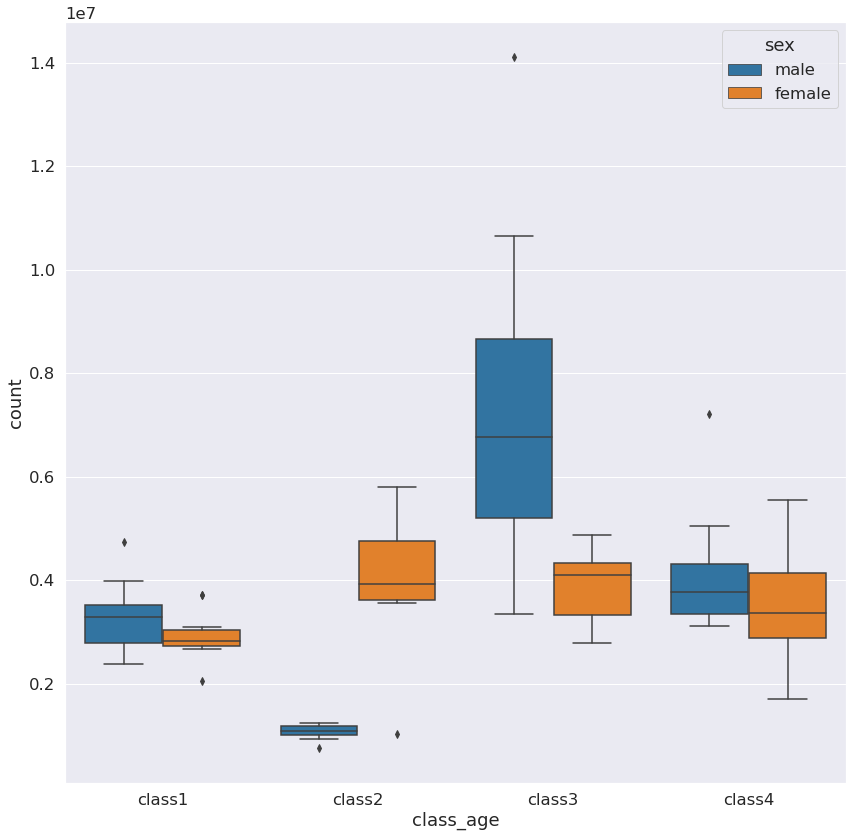

In [210]:
plt.figure(figsize=(14,14))
ax=sns.boxplot(y='count', x='class_age',
                 data=df_empty,
                 palette="tab10",
                 hue='sex',order=['class1','class2','class3','class4'])
plt.savefig('plot_box_two_sex.pdf')

In [158]:
df_empty_male

class1_male class2_male class3_male class4_male       20
0          NaN         NaN         NaN         NaN  1348597
1          NaN         NaN         NaN         NaN  1227527
2          NaN         NaN         NaN         NaN  1301546
3          NaN         NaN         NaN         NaN   769877
4          NaN         NaN         NaN         NaN  1282922
5          NaN         NaN         NaN         NaN  1451357
6          NaN         NaN         NaN         NaN   614603
7          NaN         NaN         NaN         NaN  1545718
8          NaN         NaN         NaN         NaN  1465326
9          NaN         NaN         NaN         NaN  1384383
10         NaN         NaN         NaN         NaN   768370
11         NaN         NaN         NaN         NaN  1442790
12         NaN         NaN         NaN         NaN   628202
13         NaN         NaN         NaN         NaN  1489389
14         NaN         NaN         NaN         NaN  1338573
15         NaN         NaN         NaN         NaN  1309507
16         NaN         NaN         NaN         NaN   607649
17         NaN         NaN         NaN         NaN  1327614
18         NaN         NaN         NaN         NaN  1381278
19         NaN         NaN         NaN         NaN  1263303

In [135]:
read=pd.read_csv('/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_20rep_0.85_sample_random_all/class1_male/multilayer_edges_row.csv')

In [146]:
read[read['i']=='True'].count()

KeyError: 'i'

In [153]:
list_empty=[]
for i in range(1,21):
    i=str(i)
    x=read.value_counts(i).tolist()
    list_empty.append(x[1])

In [154]:
list_empty

[1348597,
 1227527,
 1301546,
 769877,
 1282922,
 1451357,
 614603,
 1545718,
 1465326,
 1384383,
 768370,
 1442790,
 628202,
 1489389,
 1338573,
 1309507,
 607649,
 1327614,
 1381278,
 1263303]

In [297]:
list_empty=[]
for i in range(1,11):
    h=str(i)
    x=read.value_counts(h)
    print(x)
    data=x.to_dict()
    print(data)
    num=data[(True,)]
    list_empty.append(num)

1    
False    5977755
True     1348597
dtype: int64
{(False,): 5977755, (True,): 1348597}
2    
False    6098825
True     1227527
dtype: int64
{(False,): 6098825, (True,): 1227527}
3    
False    6024806
True     1301546
dtype: int64
{(False,): 6024806, (True,): 1301546}
4    
False    6556475
True      769877
dtype: int64
{(False,): 6556475, (True,): 769877}
5    
False    6043430
True     1282922
dtype: int64
{(False,): 6043430, (True,): 1282922}
6    
False    5874995
True     1451357
dtype: int64
{(False,): 5874995, (True,): 1451357}
7    
False    6711749
True      614603
dtype: int64
{(False,): 6711749, (True,): 614603}
8    
False    5780634
True     1545718
dtype: int64
{(False,): 5780634, (True,): 1545718}
9    
False    5861026
True     1465326
dtype: int64
{(False,): 5861026, (True,): 1465326}
10
False    5941969
True     1384383
dtype: int64
{False: 5941969, True: 1384383}


KeyError: (True,)

In [70]:
df=pd.read_csv('/home/storage_1/yuping/compute_GCN/blood.csv')

In [81]:
df

Unnamed: 0  number_of_edges  number_of_nodes  number_connected_components  \
0  30-39_male            17256             5060                          639   
1  60-69_male             8509             5217                         1103   
2  20-29_male             9096             3547                          644   
3  50-59_male            67146             8743                          991   
4  40-49_male            27460             5896                          838   
5  70-79_male             5570             3383                          539   

   average_clustering_coefficient  diameter  average_shortest_path_length  \
0                        0.196227       NaN                           NaN   
1                        0.256047       NaN                           NaN   
2                        0.165998       NaN                           NaN   
3                        0.298566       NaN                           NaN   
4                        0.238048       NaN                           NaN   
5                        0.150204       NaN                           NaN   

   class   sex  
0  30-39  male  
1  60-69  male  
2  20-29  male  
3  50-59  male  
4  40-49  male  
5  70-79  male

In [72]:
df['class']='NA'
df['sex']='NA'

In [80]:
for i in df.index:
    print(i)
    liste=df.loc[i]['Unnamed: 0'].split('_')
    df.loc[i,'class']=str(liste[0])
    df.loc[i,'sex']=str(liste[1])

0
1
2
3
4
5


In [74]:
column_unique=df['sex'].unique()

In [75]:
column_unique

array(['male'], dtype=object)

In [76]:
df_male=df[df['sex'].isin(['male'])]

In [26]:
df_female=df[df['sex'].isin(['female'])]

In [82]:
df_female=df_female.set_index('class')
df_male=df_male.set_index('class')

KeyError: "None of ['class'] are in the columns"

In [83]:
df_male=df_male.set_index('class')

In [84]:
df_male

Unnamed: 0  number_of_edges  number_of_nodes  \
class                                                 
30-39  30-39_male            17256             5060   
60-69  60-69_male             8509             5217   
20-29  20-29_male             9096             3547   
50-59  50-59_male            67146             8743   
40-49  40-49_male            27460             5896   
70-79  70-79_male             5570             3383   

       number_connected_components  average_clustering_coefficient  diameter  \
class                                                                          
30-39                          639                        0.196227       NaN   
60-69                         1103                        0.256047       NaN   
20-29                          644                        0.165998       NaN   
50-59                          991                        0.298566       NaN   
40-49                          838                        0.238048       NaN   
70-79                          539                        0.150204       NaN   

       average_shortest_path_length   sex  
class                                      
30-39                           NaN  male  
60-69                           NaN  male  
20-29                           NaN  male  
50-59                           NaN  male  
40-49                           NaN  male  
70-79                           NaN  male

In [29]:
df_female

Unnamed: 0  number_of_edges  number_of_nodes  \
class                                                     
class4  class4_female           129796            10700   
class5  class5_female             8131             6022   
class2  class2_female             8557             6838   
class6  class6_female             9881             6665   
class3  class3_female            18430             6365   
class1  class1_female            28203             7811   

        number_connected_components  average_clustering_coefficient  diameter  \
class                                                                           
class4                          998                        0.297745       NaN   
class5                         1605                        0.174053       NaN   
class2                         1534                        0.136650       NaN   
class6                         1419                        0.172058       NaN   
class3                         1526                        0.208733       NaN   
class1                         1548                        0.198684       NaN   

        average_shortest_path_length     sex  
class                                         
class4                           NaN  female  
class5                           NaN  female  
class2                           NaN  female  
class6                           NaN  female  
class3                           NaN  female  
class1                           NaN  female

In [85]:
df_male.sort_index(inplace=True)

In [78]:
df_male.sort_index(inplace=True)
df_female.sort_index(inplace=True)

In [86]:
df_male

Unnamed: 0  number_of_edges  number_of_nodes  \
class                                                 
20-29  20-29_male             9096             3547   
30-39  30-39_male            17256             5060   
40-49  40-49_male            27460             5896   
50-59  50-59_male            67146             8743   
60-69  60-69_male             8509             5217   
70-79  70-79_male             5570             3383   

       number_connected_components  average_clustering_coefficient  diameter  \
class                                                                          
20-29                          644                        0.165998       NaN   
30-39                          639                        0.196227       NaN   
40-49                          838                        0.238048       NaN   
50-59                          991                        0.298566       NaN   
60-69                         1103                        0.256047       NaN   
70-79                          539                        0.150204       NaN   

       average_shortest_path_length   sex  
class                                      
20-29                           NaN  male  
30-39                           NaN  male  
40-49                           NaN  male  
50-59                           NaN  male  
60-69                           NaN  male  
70-79                           NaN  male

In [32]:
df_female=df_female.drop(columns=['Unnamed: 0'])

In [ ]:
df_female=df_female.drop(columns=['class6'])

### result of the correlation 0.85 ,ratio 0.7

In [16]:
df_female

number_of_edges  number_of_nodes  number_connected_components  \
class                                                                   
class1            28203             7811                         1548   
class2             8557             6838                         1534   
class3            18430             6365                         1526   
class4           129796            10700                          998   
class5             8131             6022                         1605   
class6             9881             6665                         1419   

        average_clustering_coefficient  diameter  \
class                                              
class1                        0.198684       NaN   
class2                        0.136650       NaN   
class3                        0.208733       NaN   
class4                        0.297745       NaN   
class5                        0.174053       NaN   
class6                        0.172058       NaN   

        average_shortest_path_length     sex  
class                                         
class1                           NaN  female  
class2                           NaN  female  
class3                           NaN  female  
class4                           NaN  female  
class5                           NaN  female  
class6                           NaN  female

In [88]:
df_male

Unnamed: 0  number_of_edges  number_of_nodes  \
class                                                 
20-29  20-29_male             9096             3547   
30-39  30-39_male            17256             5060   
40-49  40-49_male            27460             5896   
50-59  50-59_male            67146             8743   
60-69  60-69_male             8509             5217   
70-79  70-79_male             5570             3383   

       number_connected_components  average_clustering_coefficient  diameter  \
class                                                                          
20-29                          644                        0.165998       NaN   
30-39                          639                        0.196227       NaN   
40-49                          838                        0.238048       NaN   
50-59                          991                        0.298566       NaN   
60-69                         1103                        0.256047       NaN   
70-79                          539                        0.150204       NaN   

       average_shortest_path_length   sex  
class                                      
20-29                           NaN  male  
30-39                           NaN  male  
40-49                           NaN  male  
50-59                           NaN  male  
60-69                           NaN  male  
70-79                           NaN  male

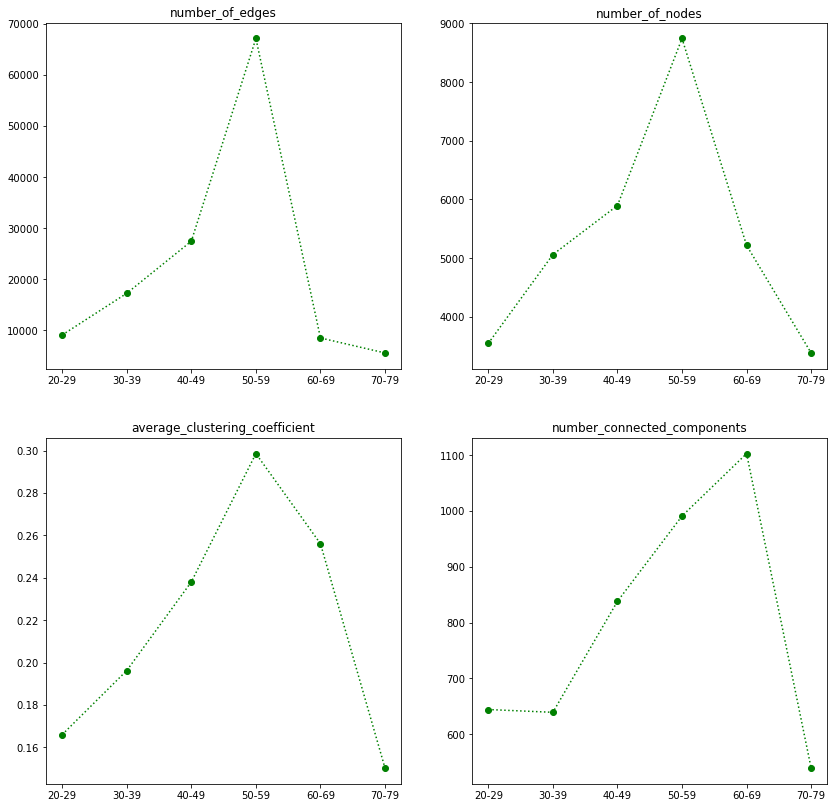

In [90]:
plt.figure(figsize=(14,14))
ax1=plt.subplot(2,2,1)
ax1.plot(df_male['number_of_edges'],'g',marker="o",linestyle=':')
ax1.title.set_text('number_of_edges')
ax2=plt.subplot(2,2,2)
ax2.plot(df_male['number_of_nodes'],'g',marker="o", linestyle=':')
ax2.title.set_text('number_of_nodes')
ax3=plt.subplot(2,2,3)
ax3.plot(df_male['average_clustering_coefficient'],'g',marker="o", linestyle=':')
ax3.title.set_text('average_clustering_coefficient')
ax4=plt.subplot(2,2,4)
ax4.plot(df_male['number_connected_components'],'g',marker="o", linestyle=':')
ax4.title.set_text('number_connected_components')
plt.savefig('plot_blood.pdf')

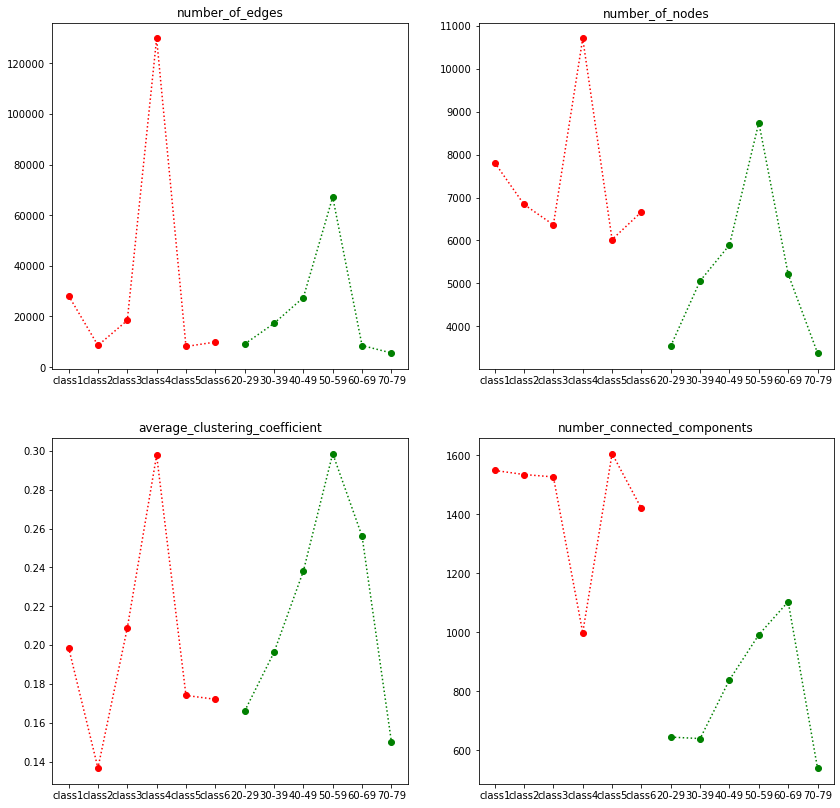

In [87]:
plt.figure(figsize=(14,14))
ax1=plt.subplot(2,2,1)
ax1.plot(df_female['number_of_edges'],'r',marker="o", linestyle=':')
ax1.plot(df_male['number_of_edges'],'g',marker="o",linestyle=':')
ax1.title.set_text('number_of_edges')
ax2=plt.subplot(2,2,2)
ax2.plot(df_female['number_of_nodes'],'r',marker="o", linestyle=':')
ax2.plot(df_male['number_of_nodes'],'g',marker="o", linestyle=':')
ax2.title.set_text('number_of_nodes')
ax3=plt.subplot(2,2,3)
ax3.plot(df_female['average_clustering_coefficient'],'r',marker="o", linestyle=':')
ax3.plot(df_male['average_clustering_coefficient'],'g',marker="o", linestyle=':')
ax3.title.set_text('average_clustering_coefficient')
ax4=plt.subplot(2,2,4)
ax4.plot(df_female['number_connected_components'],'r',marker="o", linestyle=':')
ax4.plot(df_male['number_connected_components'],'g',marker="o", linestyle=':')
ax4.title.set_text('number_connected_components')
plt.savefig('plot_hyo_10sample_20rep_1.pdf')

ValueError: x and y must be the same size

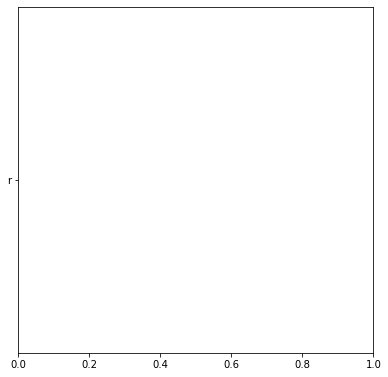

In [46]:
plt.figure(figsize=(14,14))
ax1=plt.subplot(2,2,1)
ax1.scatter(df_female['number_of_edges'],'r')
ax1.scatter(df_male['number_of_edges'],'g')
ax1.title.set_text('number_of_edges')
ax2=plt.subplot(2,2,2)
ax2.scatter(df_female['number_of_nodes'],'r')
ax2.scatter(df_male['number_of_nodes'],'g')
ax2.title.set_text('number_of_nodes')
ax3=plt.subplot(2,2,3)
ax3.scatter(df_female['average_clustering_coefficient'],'r')
ax3.scatter(df_male['average_clustering_coefficient'],'g')
ax3.title.set_text('average_clustering_coefficient')
ax4=plt.subplot(2,2,4)
ax4.scatter(df_female['number_connected_components'],'r')
ax4.scatter(df_male['number_connected_components'],'g')
ax4.title.set_text('number_connected_components')
plt.savefig('plot_hyo_10sample_20rep_1.pdf')

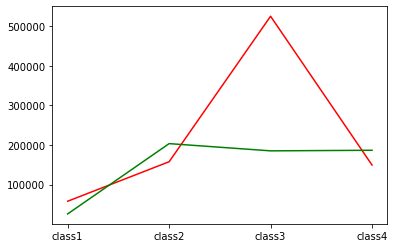

In [20]:
plt.figure()
plt.plot(df_female['number_of_edges'],'r')
plt.plot(df_male['number_of_edges'],'g')

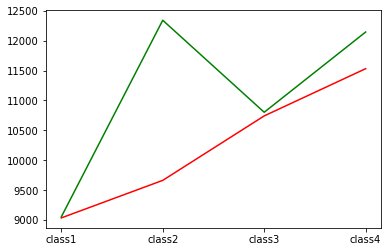

In [21]:
plt.figure()
plt.plot(df_female['number_of_nodes'],'r')
plt.plot(df_male['number_of_nodes'],'g')

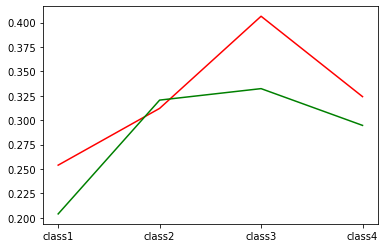

In [22]:
plt.figure()
plt.plot(df_female['average_clustering_coefficient'],'r')
plt.plot(df_male['average_clustering_coefficient'],'g')

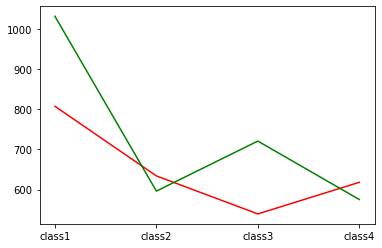

In [23]:
plt.figure()
plt.plot(df_female['number_connected_components'],'r')
plt.plot(df_male['number_connected_components'],'g')

### result of the correlation 0.9 ,ratio 0.7

In [163]:
df_female

number_of_edges  number_of_nodes  number_connected_components  \
class                                                                   
class1            99468             4854                          209   
class2             3562              764                          126   
class3           336445            11965                          252   
class4           452845            10020                          218   

        average_clustering_coefficient     sex  
class                                           
class1                        0.397083  Female  
class2                        0.409886  Female  
class3                        0.371640  Female  
class4                        0.428432  Female

In [164]:
df_male

number_of_edges  number_of_nodes  number_connected_components  \
class                                                                   
class1          1087182             8830                          109   
class2           116131             2925                          142   
class3            34814             4471                          274   
class4          2215363             7963                          116   

        average_clustering_coefficient   sex  
class                                         
class1                        0.569271  male  
class2                        0.480209  male  
class3                        0.326273  male  
class4                        0.627175  male

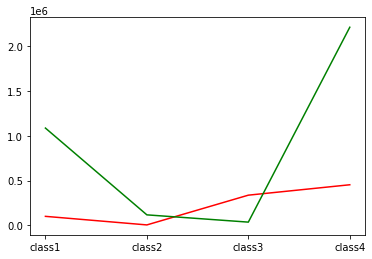

In [165]:
plt.figure()
plt.plot(df_female['number_of_edges'],'r')
plt.plot(df_male['number_of_edges'],'g')

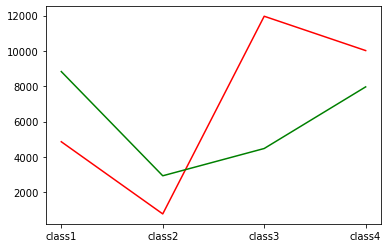

In [166]:
plt.figure()
plt.plot(df_female['number_of_nodes'],'r')
plt.plot(df_male['number_of_nodes'],'g')

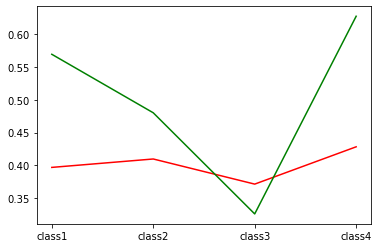

In [167]:
plt.figure()
plt.plot(df_female['average_clustering_coefficient'],'r')
plt.plot(df_male['average_clustering_coefficient'],'g')

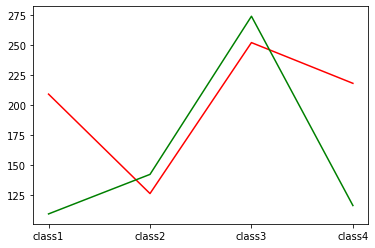

In [168]:
plt.figure()
plt.plot(df_female['number_connected_components'],'r')
plt.plot(df_male['number_connected_components'],'g')

### test ramdom

In [4]:
dict_sample={}
for i in range(1,11):
    name=f'/home/storage_1/yuping/GCN/Liver/class4/Female/Liver/{i}/liver_class4_Female_vst.txt'
    print(name)
    text=pd.read_csv(name,sep=" ")
    x=text.index.tolist()
    x.sort()
    y=''.join(str(i) for i in x)
    dict_sample[i]=y


/home/storage_1/yuping/GCN/Liver/class4/Female/Liver/1/liver_class4_Female_vst.txt
/home/storage_1/yuping/GCN/Liver/class4/Female/Liver/2/liver_class4_Female_vst.txt
/home/storage_1/yuping/GCN/Liver/class4/Female/Liver/3/liver_class4_Female_vst.txt
/home/storage_1/yuping/GCN/Liver/class4/Female/Liver/4/liver_class4_Female_vst.txt
/home/storage_1/yuping/GCN/Liver/class4/Female/Liver/5/liver_class4_Female_vst.txt
/home/storage_1/yuping/GCN/Liver/class4/Female/Liver/6/liver_class4_Female_vst.txt
/home/storage_1/yuping/GCN/Liver/class4/Female/Liver/7/liver_class4_Female_vst.txt
/home/storage_1/yuping/GCN/Liver/class4/Female/Liver/8/liver_class4_Female_vst.txt
/home/storage_1/yuping/GCN/Liver/class4/Female/Liver/9/liver_class4_Female_vst.txt
/home/storage_1/yuping/GCN/Liver/class4/Female/Liver/10/liver_class4_Female_vst.txt


In [5]:
dict_sample

{1: 'SRR10025184SRR17261651SRR17261652SRR17261653SRR17261763SRR17261764SRR5115673SRR5115674SRR5115675SRR8145407SRR8145408SRR8145409SRR8145410SRR8145411SRR8145412',
 2: 'SRR10025185SRR17261651SRR17261652SRR17261653SRR17261705SRR17261763SRR17261764SRR5115673SRR5115674SRR5115675SRR8145407SRR8145408SRR8145409SRR8145411SRR8145412',
 3: 'SRR10025184SRR17261651SRR17261652SRR17261653SRR17261705SRR17261763SRR17261764SRR5115673SRR5115674SRR5115675SRR8145407SRR8145408SRR8145409SRR8145410SRR8145411',
 4: 'SRR10025184SRR10025185SRR17261651SRR17261652SRR17261653SRR17261705SRR17261763SRR5115673SRR5115674SRR5115675SRR8145407SRR8145408SRR8145409SRR8145410SRR8145412',
 5: 'SRR10025184SRR17261651SRR17261652SRR17261653SRR17261705SRR17261763SRR5115673SRR5115674SRR5115675SRR8145407SRR8145408SRR8145409SRR8145410SRR8145411SRR8145412',
 6: 'SRR10025184SRR10025185SRR17261652SRR17261653SRR17261705SRR17261763SRR5115673SRR5115674SRR5115675SRR8145407SRR8145408SRR8145409SRR8145410SRR8145411SRR8145412',
 7: 'SRR10025

In [6]:
x=dict(zip(dict_sample.values(),dict_sample.keys()))

In [7]:
x

{'SRR10025184SRR17261651SRR17261652SRR17261653SRR17261763SRR17261764SRR5115673SRR5115674SRR5115675SRR8145407SRR8145408SRR8145409SRR8145410SRR8145411SRR8145412': 1,
 'SRR10025185SRR17261651SRR17261652SRR17261653SRR17261705SRR17261763SRR17261764SRR5115673SRR5115674SRR5115675SRR8145407SRR8145408SRR8145409SRR8145411SRR8145412': 2,
 'SRR10025184SRR17261651SRR17261652SRR17261653SRR17261705SRR17261763SRR17261764SRR5115673SRR5115674SRR5115675SRR8145407SRR8145408SRR8145409SRR8145410SRR8145411': 3,
 'SRR10025184SRR10025185SRR17261651SRR17261652SRR17261653SRR17261705SRR17261763SRR5115673SRR5115674SRR5115675SRR8145407SRR8145408SRR8145409SRR8145410SRR8145412': 4,
 'SRR10025184SRR17261651SRR17261652SRR17261653SRR17261705SRR17261763SRR5115673SRR5115674SRR5115675SRR8145407SRR8145408SRR8145409SRR8145410SRR8145411SRR8145412': 5,
 'SRR10025184SRR10025185SRR17261652SRR17261653SRR17261705SRR17261763SRR5115673SRR5115674SRR5115675SRR8145407SRR8145408SRR8145409SRR8145410SRR8145411SRR8145412': 6,
 'SRR10025184

In [325]:
df_sample=df.from_dict(dict_sample)

In [326]:
df_sample

1            2            3            4            5   \
0   SRR10025177  SRR10025177  SRR10025177  SRR10025177  SRR10025177   
1   SRR10025178  SRR10025178  SRR10025178  SRR10025178  SRR10025178   
2   SRR10025179  SRR10025179  SRR10025179  SRR10025179  SRR13640879   
3   SRR13640879  SRR13640879  SRR13640879  SRR13640881  SRR13640881   
4   SRR13640881  SRR13640881  SRR13640881  SRR13640883  SRR13640883   
5   SRR13640883  SRR13640883  SRR13640883  SRR15809339  SRR15809339   
6   SRR15809339  SRR15809339  SRR15809339  SRR15809340  SRR15809340   
7   SRR15809340  SRR15809340  SRR15809340   SRR6292438   SRR6292438   
8    SRR6292438   SRR6292438   SRR6292438   SRR6292439   SRR6292439   
9    SRR7050693   SRR6292439   SRR6292439   SRR7050693   SRR7050693   
10   SRR7050694   SRR7050693   SRR7050694   SRR7050694   SRR7050694   
11   SRR7050695   SRR7050694   SRR7050695   SRR7050695   SRR7050695   
12   SRR9119213   SRR7050695   SRR9119213   SRR9119213   SRR9119213   
13   SRR9119214   SRR9119213   SRR9119214   SRR9119214   SRR9119214   
14   SRR9119215   SRR9119214   SRR9119215   SRR9119215   SRR9119215   

             6            7            8            9            10  
0   SRR10025177  SRR10025177  SRR10025177  SRR10025177  SRR10025177  
1   SRR10025178  SRR10025178  SRR10025179  SRR10025178  SRR10025178  
2   SRR10025179  SRR10025179  SRR13640879  SRR10025179  SRR10025179  
3   SRR13640879  SRR13640879  SRR13640881  SRR13640879  SRR13640881  
4   SRR13640881  SRR13640881  SRR13640883  SRR13640881  SRR13640883  
5   SRR13640883  SRR13640883  SRR15809339  SRR13640883  SRR15809339  
6   SRR15809340  SRR15809339  SRR15809340  SRR15809339  SRR15809340  
7    SRR6292438  SRR15809340   SRR6292438  SRR15809340   SRR6292438  
8    SRR6292439   SRR6292438   SRR6292439   SRR6292438   SRR6292439  
9    SRR7050693   SRR6292439   SRR7050693   SRR6292439   SRR7050693  
10   SRR7050694   SRR7050693   SRR7050694   SRR7050693   SRR7050694  
11   SRR7050695   SRR7050694   SRR7050695   SRR7050695   SRR7050695  
12   SRR9119213   SRR7050695   SRR9119213   SRR9119213   SRR9119213  
13   SRR9119214   SRR9119213   SRR9119214   SRR9119214   SRR9119214  
14   SRR9119215   SRR9119214   SRR9119215   SRR9119215   SRR9119215

In [327]:
x=df_sample.value_counts()

In [328]:
x

1            2            3            4            5            6            7            8            9            10         
SRR10025177  SRR10025177  SRR10025177  SRR10025177  SRR10025177  SRR10025177  SRR10025177  SRR10025177  SRR10025177  SRR10025177    1
SRR10025178  SRR10025178  SRR10025178  SRR10025178  SRR10025178  SRR10025178  SRR10025178  SRR10025179  SRR10025178  SRR10025178    1
SRR10025179  SRR10025179  SRR10025179  SRR10025179  SRR13640879  SRR10025179  SRR10025179  SRR13640879  SRR10025179  SRR10025179    1
SRR13640879  SRR13640879  SRR13640879  SRR13640881  SRR13640881  SRR13640879  SRR13640879  SRR13640881  SRR13640879  SRR13640881    1
SRR13640881  SRR13640881  SRR13640881  SRR13640883  SRR13640883  SRR13640881  SRR13640881  SRR13640883  SRR13640881  SRR13640883    1
SRR13640883  SRR13640883  SRR13640883  SRR15809339  SRR15809339  SRR13640883  SRR13640883  SRR15809339  SRR13640883  SRR15809339    1
SRR15809339  SRR15809339  SRR15809339  SRR15809340  SRR15809340  SR

In [300]:
text=pd.read_csv('/home/storage_1/yuping/GCN/Liver/class2/Female/Liver/10/liver_class2_Female_vst.txt',sep=" ")

In [306]:
x=text.index.tolist()

In [307]:
x

['SRR2297462',
 'SRR2297493',
 'SRR2297480',
 'SRR2297472',
 'SRR2297479',
 'SRR2297474',
 'SRR2297461',
 'SRR1794786',
 'SRR2297489',
 'SRR2297475',
 'SRR2297507',
 'SRR2297463',
 'SRR2297467',
 'SRR2297485',
 'SRR2297478']

In [286]:
x

<bound method DataFrame.transform of    ENSMUSG00000051951.6 "ENSMUSG00000025902.14" "ENSMUSG00000033845.14" "ENSMUSG00000025903.15" "ENSMUSG00000033813.16" "ENSMUSG00000002459.18" "ENSMUSG00000033793.13" "ENSMUSG00000025907.15" "ENSMUSG00000051285.18" "ENSMUSG00000025909.17" "ENSMUSG00000061024.9" "ENSMUSG00000025911.15" "ENSMUSG00000067879.4" "ENSMUSG00000025912.17" "ENSMUSG00000045210.9" "ENSMUSG00000025915.15" "ENSMUSG00000046101.17" "ENSMUSG00000099032.3" "ENSMUSG00000025916.11" "ENSMUSG00000025917.10" "ENSMUSG00000056763.17" "ENSMUSG00000067851.12" "ENSMUSG00000048960.14" "ENSMUSG00000016918.16" "ENSMUSG00000025938.17" "ENSMUSG00000042414.8" "ENSMUSG00000005886.15" "ENSMUSG00000025935.11" "ENSMUSG00000025937.7" "ENSMUSG00000067813.4" "ENSMUSG00000025932.15" "ENSMUSG00000025930.7" "ENSMUSG00000025925.15" "ENSMUSG00000032719.5" "ENSMUSG00000043716.14" "ENSMUSG00000025921.8" "ENSMUSG00000025920.20" "ENSMUSG00000025939.20" "ENSMUSG00000079658.10" "ENSMUSG00000025940.7" "ENSMUSG000000